## Importing the Libraries

In [152]:
import numpy as np

import pandas as pd 
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


## Reading the Vancouver Postal Code data from zip-codes.com and creating a List of Zip Codes

In [154]:
from bs4 import BeautifulSoup
#Reading HTMl page
url='https://www.zip-codes.com/canadian/city.asp?city=vancouver&province=bc'
response=requests.get(url)
html = response.text
page = BeautifulSoup(html,'lxml')

In [155]:
contents=page.find_all('a')

In [156]:
l = []
for link in page.findAll('a'):
    l.append(link.string)

In [157]:
list_of_VC = []
for i in range(27,427):
    list_of_VC.append(l[i])
print(list_of_VC)

['V5K 0A1', 'V5K 0A2', 'V5K 0A3', 'V5K 0A4', 'V5K 0A5', 'V5K 0A6', 'V5K 0A7', 'V5K 0A8', 'V5K 0A9', 'V5K 0B1', 'V5K 0B2', 'V5K 0B3', 'V5K 0B4', 'V5K 0B5', 'V5K 0B6', 'V5K 0B7', 'V5K 0B8', 'V5K 0B9', 'V5K 0C1', 'V5K 0C2', 'V5K 0C3', 'V5K 0C4', 'V5K 0C5', 'V5K 0C6', 'V5K 0C7', 'V5K 0C9', 'V5K 0E1', 'V5K 0E2', 'V5K 0E3', 'V5K 0E4', 'V5K 0E5', 'V5K 0E6', 'V5K 0E7', 'V5K 1A1', 'V5K 1A4', 'V5K 1A5', 'V5K 1A6', 'V5K 1A7', 'V5K 1A8', 'V5K 1A9', 'V5K 1B1', 'V5K 1B2', 'V5K 1B3', 'V5K 1B4', 'V5K 1B5', 'V5K 1B6', 'V5K 1B7', 'V5K 1B8', 'V5K 1B9', 'V5K 1C1', 'V5K 1C3', 'V5K 1C4', 'V5K 1C5', 'V5K 1C6', 'V5K 1C7', 'V5K 1C8', 'V5K 1C9', 'V5K 1E1', 'V5K 1E2', 'V5K 1E3', 'V5K 1E4', 'V5K 1E5', 'V5K 1E6', 'V5K 1E7', 'V5K 1E8', 'V5K 1E9', 'V5K 1G1', 'V5K 1G2', 'V5K 1G3', 'V5K 1G4', 'V5K 1G5', 'V5K 1G6', 'V5K 1G7', 'V5K 1G8', 'V5K 1G9', 'V5K 1H1', 'V5K 1H2', 'V5K 1H3', 'V5K 1H4', 'V5K 1H5', 'V5K 1H6', 'V5K 1H7', 'V5K 1H8', 'V5K 1H9', 'V5K 1J1', 'V5K 1J2', 'V5K 1J3', 'V5K 1J4', 'V5K 1J5', 'V5K 1J6', 'V5K 1J7'

## Getting co-ordinates against these Postal Codes using Google's Geocoding API and creating the Data Frame

In [158]:
# The code was removed by Watson Studio for sharing.

In [159]:
# The code was removed by Watson Studio for sharing.

In [160]:
columns=['postalcode','neighborhood','latitude','longitude']

In [161]:
df = pd.DataFrame(columns=columns)

In [162]:
df

,postalcode,neighborhood,latitude,longitude


In [223]:
for i in list_of_VC:
    #print("-----"+i+"-----")
    url=base_url + i + '&key=' + my_key
    #print(url)
    result= requests.get(url)
    s=result.json()
    neigh=s['results'][0]['address_components'][1]['long_name']
    lat  =s['results'][0]['geometry']['location']['lat']
    lng  =s['results'][0]['geometry']['location']['lng']
    df = df.append({'postalcode': i, 'neighborhood': neigh, 'latitude': lat, 'longitude': lng}, ignore_index=True)

In [164]:
df.shape

(400, 4)

## Thus we see that in the Vancouver Data, we have predominantly two neighbourhoods !!

In [165]:
df.groupby('neighborhood').count()

,postalcode,latitude,longitude
neighborhood,,,
East Vancouver,375,375,375
Vancouver,25,25,25


## Now that our Data Frame is ready let's explore the various Postal Code Areas in Vancouver using Foursquare API !!

In [166]:
# The code was removed by Watson Studio for sharing.

In [220]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        #print(url)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
LIMIT=30
Vancouver_Venues_List = getNearbyVenues(names=df['postalcode'],
                                  latitudes=df['latitude'],
                                  longitudes=df['longitude']
                                  )

In [170]:
Vancouver_Venues_List.shape

(5475, 7)

In [171]:
Vancouver_Venues_List.rename(columns={"Neighborhood": "Postal Areas"},inplace=True)

## Let's count the neighbourhoods discovered by Foursquare API against the Postal Area Codes

In [172]:
Vancouver_Venues_List.groupby('Postal Areas').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postal Areas,,,,,,
V5K 0A1,4,4,4,4,4,4
V5K 0A2,9,9,9,9,9,9
V5K 0A3,14,14,14,14,14,14
V5K 0A4,30,30,30,30,30,30
V5K 0A5,8,8,8,8,8,8
V5K 0A6,4,4,4,4,4,4
V5K 0A7,2,2,2,2,2,2
V5K 0A8,22,22,22,22,22,22
V5K 0A9,28,28,28,28,28,28


In [173]:
# let's check the number of unique categories !!
print('There are {} uniques categories.'.format(len(Vancouver_Venues_List['Venue Category'].unique())))

There are 95 uniques categories.


## Let's split the Venue Categories now.

## For our purpose, we need to prioritise certain venues.

### In order for us to select the particular neighbourhood suitable for the business, it is imperative to filter the categories pertaining to our problem. Hence, we will stress on the categories such as Bank, Bus Stop, Event Space, Office, Paper/Office Supplies Store over restaurants and amusement parks !! 

In [174]:
# one hot encoding
Vancouver_onehot = pd.get_dummies(Vancouver_Venues_List[['Venue Category']], prefix="", prefix_sep="")

#add postal area, latitude and longitude columns back to dataframe
Vancouver_onehot['Postal Areas'] = Vancouver_Venues_List['Postal Areas'] 

# move Postal Areas column to the first column

fixed_columns = [Vancouver_onehot.columns[-1]] + list(Vancouver_onehot.columns[:-1])

Vancouver_onehot = Vancouver_onehot[fixed_columns]

Vancouver_onehot_pr=Vancouver_onehot[['Postal Areas','Bank','Bus Line','Bus Station','Bus Stop','Café','Coffee Shop','Event Space','Hotel','Inn','Office','Paper / Office Supplies Store','Rental Service']]

Vancouver_onehot_pr

,Postal Areas,Bank,Bus Line,Bus Station,Bus Stop,Café,Coffee Shop,Event Space,Hotel,Inn,Office,Paper / Office Supplies Store,Rental Service
0,V5K 0A1,0,0,0,0,0,0,0,0,0,0,0,0
1,V5K 0A1,0,0,0,0,0,0,0,0,0,0,0,0
2,V5K 0A1,0,0,0,0,0,0,0,0,0,0,0,0
3,V5K 0A1,0,0,0,0,0,0,0,0,0,0,0,0
4,V5K 0A2,0,0,0,0,0,0,0,0,0,0,0,0
5,V5K 0A2,0,0,0,0,0,1,0,0,0,0,0,0
6,V5K 0A2,0,0,0,0,0,0,0,0,0,0,0,0
7,V5K 0A2,0,0,0,0,0,0,0,0,0,0,0,0
8,V5K 0A2,0,0,0,0,0,0,0,1,0,0,0,0
9,V5K 0A2,0,0,1,0,0,0,0,0,0,0,0,0


In [175]:
Vancouver_grouped = Vancouver_onehot_pr.groupby('Postal Areas').mean().reset_index()
Vancouver_grouped

,Postal Areas,Bank,Bus Line,Bus Station,Bus Stop,Café,Coffee Shop,Event Space,Hotel,Inn,Office,Paper / Office Supplies Store,Rental Service
0,V5K 0A1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,V5K 0A2,0.000000,0.000000,0.222222,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.0,0.0
2,V5K 0A3,0.000000,0.000000,0.000000,0.071429,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,V5K 0A4,0.033333,0.000000,0.000000,0.000000,0.066667,0.133333,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,V5K 0A5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,V5K 0A6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
6,V5K 0A7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7,V5K 0A8,0.000000,0.000000,0.090909,0.045455,0.045455,0.045455,0.000000,0.045455,0.000000,0.000000,0.0,0.0
8,V5K 0A9,0.000000,0.035714,0.000000,0.000000,0.000000,0.035714,0.071429,0.000000,0.035714,0.000000,0.0,0.0
9,V5K 0B1,0.000000,0.000000,0.000000,0.000000,0.000000,0.086957,0.043478,0.000000,0.043478,0.000000,0.0,0.0


In [176]:
Vancouver_grouped.shape

(393, 13)

## Let's find out what normally are the top venues in the area. Considering our parameters ..

In [177]:
num_top_venues = 5

for hood in Vancouver_grouped['Postal Areas']:
    print("----"+hood+"----")
    temp = Vancouver_grouped[Vancouver_grouped['Postal Areas'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----V5K 0A1----
         venue  freq
0         Bank   0.0
1     Bus Line   0.0
2  Bus Station   0.0
3     Bus Stop   0.0
4         Café   0.0


----V5K 0A2----
         venue  freq
0  Bus Station  0.22
1  Coffee Shop  0.11
2        Hotel  0.11
3         Bank  0.00
4     Bus Line  0.00


----V5K 0A3----
         venue  freq
0     Bus Stop  0.07
1         Café  0.07
2  Coffee Shop  0.07
3         Bank  0.00
4     Bus Line  0.00


----V5K 0A4----
         venue  freq
0  Coffee Shop  0.13
1         Café  0.07
2         Bank  0.03
3     Bus Line  0.00
4  Bus Station  0.00


----V5K 0A5----
         venue  freq
0         Bank   0.0
1     Bus Line   0.0
2  Bus Station   0.0
3     Bus Stop   0.0
4         Café   0.0


----V5K 0A6----
         venue  freq
0         Bank   0.0
1     Bus Line   0.0
2  Bus Station   0.0
3     Bus Stop   0.0
4         Café   0.0


----V5K 0A7----
         venue  freq
0         Bank   0.0
1     Bus Line   0.0
2  Bus Station   0.0
3     Bus Stop   0.0
4         Café 

In [178]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [193]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postal Areas']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Postal Areas'] = Vancouver_grouped['Postal Areas']

for ind in np.arange(Vancouver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Vancouver_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Postal Areas,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,V5K 0A1,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Stop,Bus Station
1,V5K 0A2,Bus Station,Hotel,Coffee Shop,Rental Service,Paper / Office Supplies Store,Office,Inn,Event Space,Café,Bus Stop
2,V5K 0A3,Coffee Shop,Café,Bus Stop,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Bus Station
3,V5K 0A4,Coffee Shop,Café,Bank,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Bus Stop
4,V5K 0A5,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Stop,Bus Station


In [194]:
# set number of clusters
kclusters = 5

Vancouver_grouped_clustering = Vancouver_grouped.drop('Postal Areas', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Vancouver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 2, 2, 3, 3, 3, 0, 3, 3], dtype=int32)

In [195]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Vancouver_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Vancouver_merged = df.join(neighborhoods_venues_sorted.set_index('Postal Areas'), on='postalcode')

Vancouver_merged.head() # check the last columns!

,postalcode,neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,V5K 0A1,Vancouver,49.291018,-123.040352,3.0,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Stop,Bus Station
1,V5K 0A2,East Vancouver,49.285023,-123.028471,0.0,Bus Station,Hotel,Coffee Shop,Rental Service,Paper / Office Supplies Store,Office,Inn,Event Space,Café,Bus Stop
2,V5K 0A3,East Vancouver,49.280953,-123.028838,2.0,Coffee Shop,Café,Bus Stop,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Bus Station
3,V5K 0A4,East Vancouver,49.280918,-123.051041,2.0,Coffee Shop,Café,Bank,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Bus Stop
4,V5K 0A5,East Vancouver,49.272429,-123.052170,3.0,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Stop,Bus Station


In [196]:
Vancouver_merged.dropna(subset=['Cluster Labels'],inplace=True)

In [197]:
Vancouver_merged['Cluster Labels'].unique()

array([3., 0., 2., 4., 1.])

In [198]:
Vancouver_merged['Cluster Labels'] = Vancouver_merged['Cluster Labels'].astype('int32')

## Now let's create the map and see how our Postal Area Clusters look !!

In [211]:
# create map

address = 'Vancouver, British Columbia, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Vancouver_merged['latitude'], Vancouver_merged['longitude'], Vancouver_merged['postalcode'], Vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


In [216]:
# The code was removed by Watson Studio for sharing.

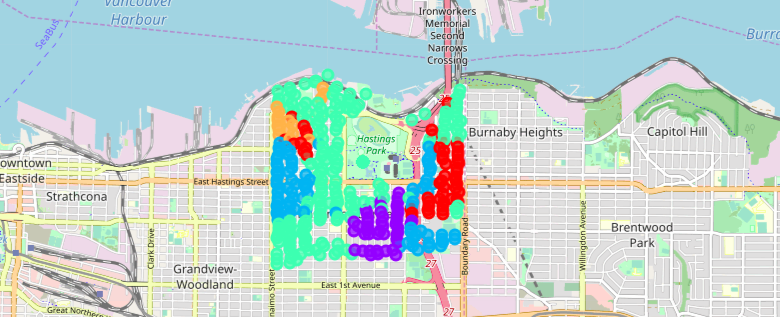

In [217]:
from IPython.display import Image
Image(filename='img.png')

## Let's examine the clusters now !!

In [206]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 0, Vancouver_merged.columns[[0] + list(range(5, Vancouver_merged.shape[1]))]]

,postalcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,V5K 0A2,Bus Station,Hotel,Coffee Shop,Rental Service,Paper / Office Supplies Store,Office,Inn,Event Space,Café,Bus Stop
7,V5K 0A8,Bus Station,Hotel,Coffee Shop,Café,Bus Stop,Rental Service,Paper / Office Supplies Store,Office,Inn,Event Space
69,V5K 1G4,Bus Station,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Stop
75,V5K 1H1,Bus Station,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Stop
93,V5K 1K1,Bus Station,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Stop
106,V5K 1L5,Bus Station,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Stop
107,V5K 1L6,Bus Station,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Stop
111,V5K 1M2,Bus Station,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Stop
116,V5K 1M7,Café,Bus Stop,Bus Station,Bank,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space
119,V5K 1N1,Bus Stop,Bus Station,Bank,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop


In [207]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 1, Vancouver_merged.columns[[0] + list(range(5, Vancouver_merged.shape[1]))]]

,postalcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
219,V5K 2C6,Event Space,Café,Bus Stop,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Coffee Shop,Bus Station
241,V5K 2H1,Office,Event Space,Café,Rental Service,Paper / Office Supplies Store,Inn,Hotel,Coffee Shop,Bus Stop,Bus Station
243,V5K 2H3,Event Space,Café,Bus Stop,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Coffee Shop,Bus Station
244,V5K 2H4,Event Space,Café,Bus Stop,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Coffee Shop,Bus Station
265,V5K 2K7,Office,Event Space,Café,Bus Line,Rental Service,Paper / Office Supplies Store,Inn,Hotel,Coffee Shop,Bus Stop
267,V5K 2K9,Office,Event Space,Café,Rental Service,Paper / Office Supplies Store,Inn,Hotel,Coffee Shop,Bus Stop,Bus Station
269,V5K 2L2,Event Space,Café,Bus Stop,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Coffee Shop,Bus Station
270,V5K 2L3,Event Space,Café,Bus Stop,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Coffee Shop,Bus Station
291,V5K 2N6,Office,Event Space,Café,Bus Line,Rental Service,Paper / Office Supplies Store,Inn,Hotel,Coffee Shop,Bus Stop
292,V5K 2N7,Office,Event Space,Café,Rental Service,Paper / Office Supplies Store,Inn,Hotel,Coffee Shop,Bus Stop,Bus Station


In [208]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 2, Vancouver_merged.columns[[0] + list(range(5, Vancouver_merged.shape[1]))]]

,postalcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,V5K 0A3,Coffee Shop,Café,Bus Stop,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Bus Station
3,V5K 0A4,Coffee Shop,Café,Bank,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Bus Stop
117,V5K 1M8,Café,Coffee Shop,Bus Station,Bus Stop,Bank,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel
122,V5K 1N4,Coffee Shop,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Café,Bus Stop,Bus Station
131,V5K 1P5,Coffee Shop,Café,Bus Station,Bus Stop,Bank,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel
132,V5K 1P6,Coffee Shop,Café,Bus Station,Bus Stop,Bank,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel
133,V5K 1P7,Café,Coffee Shop,Bus Station,Bus Stop,Bank,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel
134,V5K 1P8,Coffee Shop,Café,Bus Station,Bus Stop,Bank,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel
141,V5K 1R8,Coffee Shop,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Café,Bus Stop,Bus Station
142,V5K 1R9,Coffee Shop,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Café,Bus Stop,Bus Station


In [209]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 3, Vancouver_merged.columns[[0] + list(range(5, Vancouver_merged.shape[1]))]]

,postalcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,V5K 0A1,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Stop,Bus Station
4,V5K 0A5,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Stop,Bus Station
5,V5K 0A6,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Stop,Bus Station
6,V5K 0A7,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Stop,Bus Station
8,V5K 0A9,Event Space,Inn,Coffee Shop,Bus Line,Rental Service,Paper / Office Supplies Store,Office,Hotel,Café,Bus Stop
9,V5K 0B1,Coffee Shop,Inn,Event Space,Rental Service,Paper / Office Supplies Store,Office,Hotel,Café,Bus Stop,Bus Station
10,V5K 0B2,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Stop,Bus Station
11,V5K 0B3,Event Space,Inn,Coffee Shop,Bus Line,Rental Service,Paper / Office Supplies Store,Office,Hotel,Café,Bus Stop
12,V5K 0B4,Event Space,Inn,Coffee Shop,Bus Line,Rental Service,Paper / Office Supplies Store,Office,Hotel,Café,Bus Stop
13,V5K 0B5,Event Space,Inn,Coffee Shop,Bus Line,Rental Service,Paper / Office Supplies Store,Office,Hotel,Café,Bus Stop


In [210]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 4, Vancouver_merged.columns[[0] + list(range(5, Vancouver_merged.shape[1]))]]

,postalcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,V5K 1A9,Bus Stop,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Station
50,V5K 1C3,Bus Stop,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Station
51,V5K 1C4,Bus Stop,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Station
57,V5K 1E1,Bus Stop,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop,Café,Bus Station
72,V5K 1G7,Paper / Office Supplies Store,Bus Stop,Bus Station,Rental Service,Office,Inn,Hotel,Event Space,Coffee Shop,Café
73,V5K 1G8,Bus Stop,Paper / Office Supplies Store,Bus Station,Rental Service,Office,Inn,Hotel,Event Space,Coffee Shop,Café
88,V5K 1J5,Café,Bus Stop,Bus Station,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop
89,V5K 1J6,Café,Bus Stop,Bus Station,Rental Service,Paper / Office Supplies Store,Office,Inn,Hotel,Event Space,Coffee Shop
90,V5K 1J7,Bus Stop,Paper / Office Supplies Store,Bus Station,Rental Service,Office,Inn,Hotel,Event Space,Coffee Shop,Café
91,V5K 1J8,Bus Stop,Paper / Office Supplies Store,Bus Station,Rental Service,Office,Inn,Hotel,Event Space,Coffee Shop,Café


### Therefore, as we may see, from the above data related to clusters, if the Business is related to Transportation, such as Transport Start-up / Tourism, etc., Cluster 1 or Cluster 3 is preferable due to proximity to commuting zones and cafetarias. If the Business is related to Event-Management or Organising domains, Cluster 2 is preferable owing to Proximity to Event Spaces and Offices. Cluster 3 might be a good choice for Businesses looking to have lots of Rental Service options and proximity to suppliers. Finally Cluster 5 might be the ideal choice for many owing to proximity to almost all the major facilities.

# Acknowledgement -

### 1) www.zip-codes.com
### 2) Google Geocoding API
### 3) Foursquare API
### 4) Coursera Teaching Staff